In [ ]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Normalização Min-Max
from sklearn.preprocessing import MinMaxScaler

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Métricas
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

In [ ]:
df = pd.read_csv("imoveisFinal.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,address,district,area,bedrooms,garage,type,rent,total,endereco_completo,CEP,CEP Início,IDH_2010
0,0,0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,"Rua Herval, São Paulo - SP, Brasil",03062-000,03000-000,"0,869"
1,1,1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,"Avenida São Miguel, São Paulo - SP, Brasil",03620-001,03600-000,"0,804"
2,2,2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,"Rua Oscar Freire, São Paulo - SP, Brasil",01416-002,01400-000,"0,942"
3,3,3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,"Rua Júlio Sayago, São Paulo - SP, Brasil",03669-010,03600-000,"0,804"
4,4,4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,"Rua Barata Ribeiro, São Paulo - SP, Brasil",01308-000,01300-000,"0,889"


In [ ]:

# Obter a lista de valores únicos na coluna 'district'
valores_unicos = df['district'].unique()

# Converter a lista de valores únicos para uma lista do Python
valores_unicos_lista = list(valores_unicos)

print(valores_unicos_lista)

numero_de_elementos = len(valores_unicos_lista)
print("Número de elementos em valores_unicos_lista:", numero_de_elementos)

['Belenzinho', 'Vila Marieta', 'Pinheiros', 'Vila Ré', 'Bela Vista', 'Brás', 'Brooklin Paulista', 'Centro', 'Piqueri', 'Vila Aricanduva', 'Sé', 'Tatuapé', 'Lauzane Paulista', 'Jardim Paraventi', 'Cambuci', 'Liberdade', 'Cidade Monções', 'Água Branca', 'Mooca', 'Chácara Inglesa', 'Jardim São Savério', 'Vila Amalia (zona Norte)', 'Saúde', 'Quarta Parada', 'Paraíso do Morumbi', 'Chora Menino', 'Vila Medeiros', 'Vila Guarani(zona Leste)', 'Barra Funda', 'Vila Olímpia', 'Vila Celeste', 'Vila Vivaldi', 'Vila Brasílio Machado', 'Vila Carlos de Campos', 'Vila Prudente', 'Vila Andrade', 'Campos Elíseos', 'Vila Nivi', 'Vila Palmeiras', 'Jardim Utinga', 'República', 'Vila São Luís(zona Oeste)', 'Vila Guilherme', 'Santa Ifigênia', 'Vila Moreira', 'Vila Monumento', 'Vila Penteado', 'Vila Alpina', 'Picanço', 'São Lucas', 'Sacomã', 'Vila Moinho Velho', 'Vila Santa Maria', 'Várzea da Barra Funda', 'Vila Talarico', 'Maranhão', 'Vila Santa Clara', 'Bosque da Saúde', 'Vila Constança', 'Parque Fongaro', '

# Visualizacoes

In [ ]:
# prompt: printe todos as linhas que existem alguma outra linha com os mesmos valores nas colunas "address", "district", "area", "bedrooms", "type",  "total"

import pandas as pd

# Assuming your DataFrame is named 'df'
# and it has columns 'address', 'district', 'area', 'bedrooms', 'type', and 'total'

# Find duplicate rows based on specified columns
duplicate_rows = df[df.duplicated(subset=['address', 'district', 'area', 'bedrooms', 'total'], keep=False)]

# Print all duplicate rows
duplicate_rows

,Unnamed: 0.1,Unnamed: 0,address,district,area,bedrooms,garage,type,rent,total,endereco_completo,CEP,CEP Início,IDH_2010
15,15,15,Rua Scuvero,Cambuci,75,2,0,Casa,2266,2422,"Rua Scuvero, São Paulo - SP, Brasil",01519-000,01500-000,"0,889"
16,16,15,Rua Scuvero,Cambuci,75,2,0,Casa,2266,2422,"Rua Scuvero, São Paulo - SP, Brasil",01519-000,01500-000,"0,824"
17,17,16,Rua Doutor Tomaz de Lima,Liberdade,64,2,0,Apartamento,1530,2049,"Rua Doutor Tomaz de Lima, São Paulo - SP, Brasil",01513-010,01500-000,"0,889"
18,18,16,Rua Doutor Tomaz de Lima,Liberdade,64,2,0,Apartamento,1530,2049,"Rua Doutor Tomaz de Lima, São Paulo - SP, Brasil",01513-010,01500-000,"0,824"
19,19,17,Rua Conselheiro Furtado,Liberdade,28,1,0,Studio e kitnet,2300,2750,"Rua Conselheiro Furtado, São Paulo - SP, Brasil",01511-000,01500-000,"0,889"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,10348,10450,Rua Giovani Recordati,Parque São Domingos,146,3,4,Casa em condomínio,5200,7033,"Rua Giovani Recordati, São Paulo - SP, Brasil",05113-020,05100-000,"0,906"
9039,10383,10489,Rua José Ataliba Ortiz,Vila Mangalot,107,2,2,Apartamento,4090,5549,"Rua José Ataliba Ortiz, São Paulo - SP, Brasil",05126-040,05100-000,"0,787"
9040,10384,10489,Rua José Ataliba Ortiz,Vila Mangalot,107,2,2,Apartamento,4090,5549,"Rua José Ataliba Ortiz, São Paulo - SP, Brasil",05126-040,05100-000,"0,906"
9821,11251,11392,Rua Urano,Jardim Tupanci,40,1,0,Apartamento,1300,1459,"Rua Urano, São Paulo - SP, Brasil",01532-001,01500-000,"0,889"


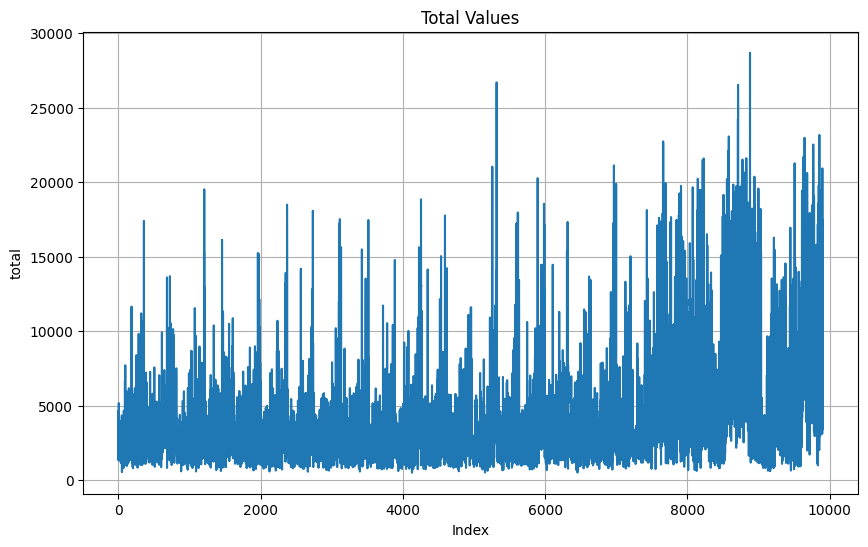

In [ ]:
# prompt: agora voce pode plotar os valores de rent na forma de um grafico?

# Plot the 'rent' values as a graph
plt.figure(figsize=(10, 6))
plt.plot(df['total'])
plt.xlabel('Index')
plt.ylabel('total')
plt.title('Total Values')
plt.grid(True)
plt.show()

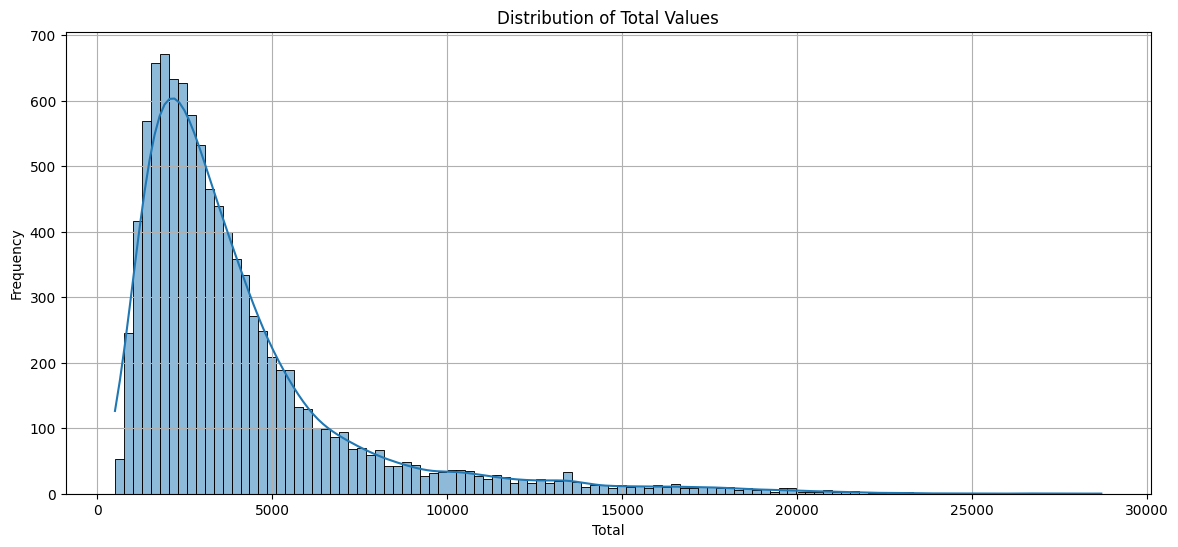

In [ ]:
# prompt: agora voce pode plotar os valores de rent na forma de uma distribuição normal?

import seaborn as sns

# Plot the 'rent' values as a distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['total'], kde=True) # kde=True adds a kernel density estimate
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.title('Distribution of Total Values')
plt.grid(True)
plt.show()

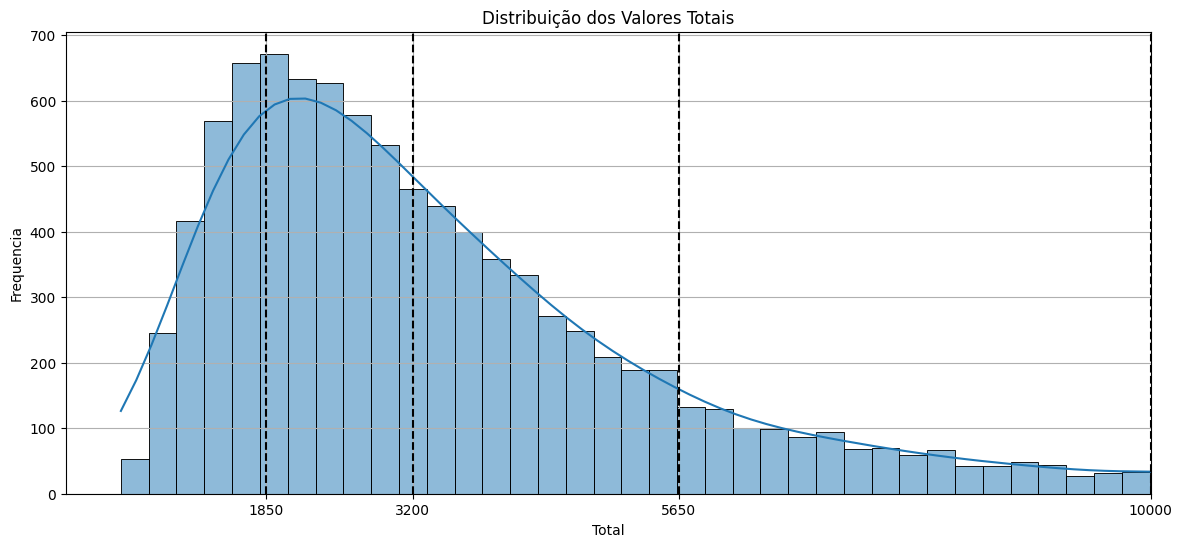

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'total' column
plt.figure(figsize=(14, 6))
sns.histplot(df['total'], kde=True) # kde=True adds a kernel density estimate
plt.xlabel('Total')
plt.ylabel('Frequencia')
plt.title('Distribuição dos Valores Totais')

# Limita o eixo x até 10k
plt.xlim(0, 10000)

# Adding specific labels for the values 1850, 3200, 5650
x_labels = [1850, 3200, 5650, 10000]
plt.xticks(x_labels)

for value in x_labels:
    plt.axvline(x=value, color='black', linestyle='--')

plt.grid(True)
plt.show()


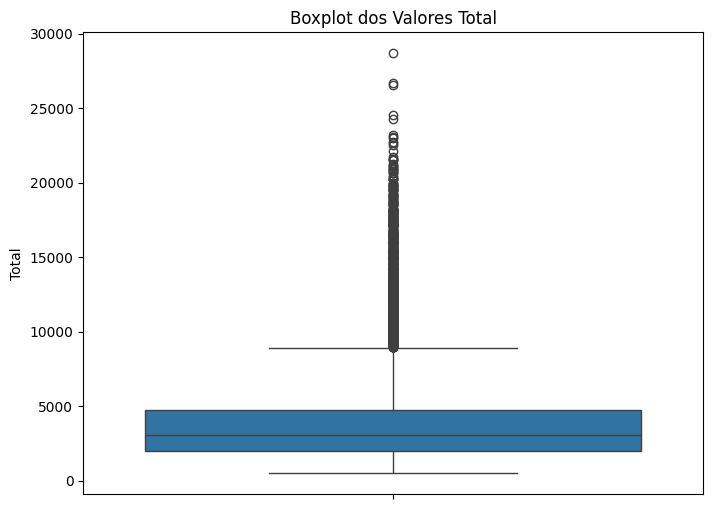

In [ ]:
# prompt: agora crie um boxplot com esses valores de total

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['total'])
plt.ylabel('Total')
plt.title('Boxplot dos Valores Total')
plt.show()

# Price range

In [ ]:
# prompt: divida a coluna price_range em até 1550, 1551 a 3875 e 3876 a 5890 e 5891 ou mais

# Create the 'price_range' column based on the specified ranges
df['price_range'] = pd.cut(df['total'], bins=[0, 1850, 3200, 5650, float('inf')],
                          labels=['Até 1850', '1850 a 3200', '3200 a 5650', '5650 ou mais'],
                          right=True)

# Display the updated DataFrame
# print(df[['total', 'price_range']].head())
df

,Unnamed: 0.1,Unnamed: 0,address,district,area,bedrooms,garage,type,rent,total,endereco_completo,CEP,CEP Início,IDH_2010,price_range
0,0,0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,"Rua Herval, São Paulo - SP, Brasil",03062-000,03000-000,"0,869",1850 a 3200
1,1,1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,"Avenida São Miguel, São Paulo - SP, Brasil",03620-001,03600-000,"0,804",Até 1850
2,2,2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,"Rua Oscar Freire, São Paulo - SP, Brasil",01416-002,01400-000,"0,942",3200 a 5650
3,3,3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,"Rua Júlio Sayago, São Paulo - SP, Brasil",03669-010,03600-000,"0,804",1850 a 3200
4,4,4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,"Rua Barata Ribeiro, São Paulo - SP, Brasil",01308-000,01300-000,"0,889",3200 a 5650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,11504,11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,"Avenida Adolfo Pinheiro, São Paulo - SP, Brasil",04734-003,04700-000,"0,909",5650 ou mais
9901,11505,11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,"Rua Professor Alexandre Correia, São Paulo - S...",05705-170,05700-000,"0,783",5650 ou mais
9902,11506,11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,"Rua Abílio Borin, São Paulo - SP, Brasil",04729-060,04700-000,"0,909",3200 a 5650
9903,11507,11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,"Rua Forte William, São Paulo - SP, Brasil",05693-000,05600-000,"0,859",5650 ou mais


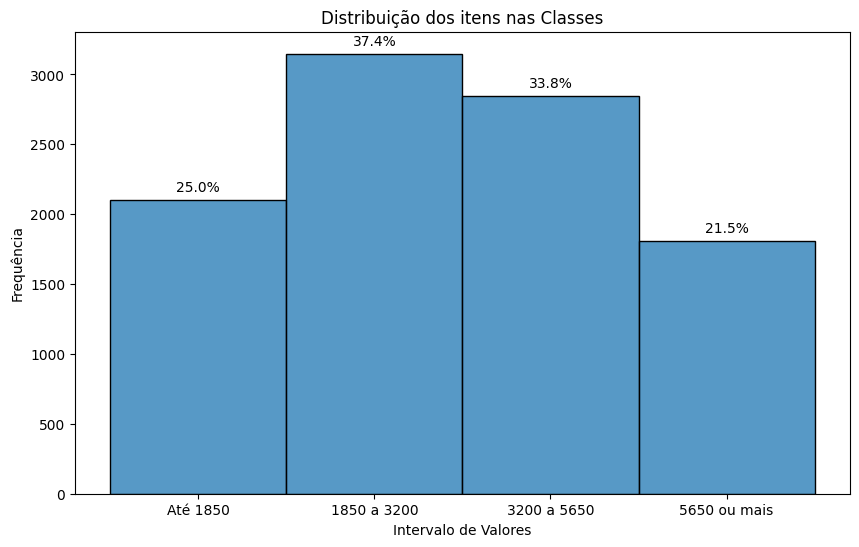

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['price_range'], kde=False, bins=[0, 1850, 3200, 5650, 10000], stat="count") # especifica os bins e a contagem como estatística
plt.xticks([0, 1, 2, 3], ['Até 1850', '1850 a 3200', '3200 a 5650', '5650 ou mais'])
plt.xlabel('Intervalo de Valores')
plt.ylabel('Frequência')
plt.title('Distribuição dos itens nas Classes')

# Adiciona as porcentagens acima de cada barra
for p in ax.patches:
    percentage = 100 * p.get_height() / sum(ax.patches[0].get_height() for p in ax.patches)  # calcula a porcentagem
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.grid(False)
plt.show()


In [ ]:
# prompt: printe o valor minimo da coluna total

min_total = df['total'].min()
print(f"The minimum value of the 'total' column is: {min_total}")

The minimum value of the 'total' column is: 509


In [ ]:
df


,Unnamed: 0.1,Unnamed: 0,address,district,area,bedrooms,garage,type,rent,total,endereco_completo,CEP,CEP Início,IDH_2010,price_range
0,0,0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,"Rua Herval, São Paulo - SP, Brasil",03062-000,03000-000,"0,869",1850 a 3200
1,1,1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,"Avenida São Miguel, São Paulo - SP, Brasil",03620-001,03600-000,"0,804",Até 1850
2,2,2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,"Rua Oscar Freire, São Paulo - SP, Brasil",01416-002,01400-000,"0,942",3200 a 5650
3,3,3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,"Rua Júlio Sayago, São Paulo - SP, Brasil",03669-010,03600-000,"0,804",1850 a 3200
4,4,4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,"Rua Barata Ribeiro, São Paulo - SP, Brasil",01308-000,01300-000,"0,889",3200 a 5650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,11504,11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778,"Avenida Adolfo Pinheiro, São Paulo - SP, Brasil",04734-003,04700-000,"0,909",5650 ou mais
9901,11505,11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480,"Rua Professor Alexandre Correia, São Paulo - S...",05705-170,05700-000,"0,783",5650 ou mais
9902,11506,11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467,"Rua Abílio Borin, São Paulo - SP, Brasil",04729-060,04700-000,"0,909",3200 a 5650
9903,11507,11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200,"Rua Forte William, São Paulo - SP, Brasil",05693-000,05600-000,"0,859",5650 ou mais


# Filtragem

In [ ]:
# Dropando Colunas
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'address', 'district', 'rent', 'endereco_completo', 'total', 'CEP', 'CEP Início', 'index[0]'], errors='ignore')

df

,area,bedrooms,garage,type,IDH_2010,price_range
0,21,1,0,Studio e kitnet,"0,869",1850 a 3200
1,15,1,1,Studio e kitnet,"0,804",Até 1850
2,18,1,0,Apartamento,"0,942",3200 a 5650
3,56,2,2,Casa em condomínio,"0,804",1850 a 3200
4,19,1,0,Studio e kitnet,"0,889",3200 a 5650
...,...,...,...,...,...,...
9900,94,2,1,Apartamento,"0,909",5650 ou mais
9901,350,4,4,Apartamento,"0,783",5650 ou mais
9902,84,1,2,Apartamento,"0,909",3200 a 5650
9903,76,1,0,Apartamento,"0,859",5650 ou mais


In [ ]:
print(df['price_range'].unique())

['1850 a 3200', 'Até 1850', '3200 a 5650', '5650 ou mais']
Categories (4, object): ['Até 1850' < '1850 a 3200' < '3200 a 5650' < '5650 ou mais']


In [ ]:
import numpy as np
import pandas as pd

print(df['price_range'].unique())

price_range_mapping = {
    price_range: i / 4 for i, price_range in enumerate(df['price_range'].unique())
}

df['price_range_numerical'] = df['price_range'].map(price_range_mapping)

print(df['price_range_numerical'].unique())
df

['1850 a 3200', 'Até 1850', '3200 a 5650', '5650 ou mais']
Categories (4, object): ['Até 1850' < '1850 a 3200' < '3200 a 5650' < '5650 ou mais']
[0.00, 0.25, 0.50, 0.75]
Categories (4, float64): [0.25 < 0.00 < 0.50 < 0.75]


,area,bedrooms,garage,type,IDH_2010,price_range,price_range_numerical
0,21,1,0,Studio e kitnet,"0,869",1850 a 3200,0.00
1,15,1,1,Studio e kitnet,"0,804",Até 1850,0.25
2,18,1,0,Apartamento,"0,942",3200 a 5650,0.50
3,56,2,2,Casa em condomínio,"0,804",1850 a 3200,0.00
4,19,1,0,Studio e kitnet,"0,889",3200 a 5650,0.50
...,...,...,...,...,...,...,...
9900,94,2,1,Apartamento,"0,909",5650 ou mais,0.75
9901,350,4,4,Apartamento,"0,783",5650 ou mais,0.75
9902,84,1,2,Apartamento,"0,909",3200 a 5650,0.50
9903,76,1,0,Apartamento,"0,859",5650 ou mais,0.75


In [ ]:
df['IDH_2010'] = df['IDH_2010'].astype(str).str.replace(',', '.').astype(float)
df

,area,bedrooms,garage,type,IDH_2010,price_range,price_range_numerical
0,21,1,0,Studio e kitnet,0.869,1850 a 3200,0.00
1,15,1,1,Studio e kitnet,0.804,Até 1850,0.25
2,18,1,0,Apartamento,0.942,3200 a 5650,0.50
3,56,2,2,Casa em condomínio,0.804,1850 a 3200,0.00
4,19,1,0,Studio e kitnet,0.889,3200 a 5650,0.50
...,...,...,...,...,...,...,...
9900,94,2,1,Apartamento,0.909,5650 ou mais,0.75
9901,350,4,4,Apartamento,0.783,5650 ou mais,0.75
9902,84,1,2,Apartamento,0.909,3200 a 5650,0.50
9903,76,1,0,Apartamento,0.859,5650 ou mais,0.75


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crie um objeto MinMaxScaler
scaler = MinMaxScaler()

df['type'], uniques = pd.factorize(df['type'])

# Selecione as colunas para normalização
colunas_para_normalizar = ['area', 'bedrooms', 'garage', 'IDH_2010', 'type']

# Aplique a normalização apenas às colunas selecionadas
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])

# Exiba o DataFrame com as colunas normalizadas
df

,area,bedrooms,garage,type,IDH_2010,price_range,price_range_numerical
0,0.036207,0.166667,0.000000,0.000000,0.678414,1850 a 3200,0.00
1,0.025862,0.166667,0.166667,0.000000,0.392070,Até 1850,0.25
2,0.031034,0.166667,0.000000,0.333333,1.000000,3200 a 5650,0.50
3,0.096552,0.333333,0.333333,0.666667,0.392070,1850 a 3200,0.00
4,0.032759,0.166667,0.000000,0.000000,0.766520,3200 a 5650,0.50
...,...,...,...,...,...,...,...
9900,0.162069,0.333333,0.166667,0.333333,0.854626,5650 ou mais,0.75
9901,0.603448,0.666667,0.666667,0.333333,0.299559,5650 ou mais,0.75
9902,0.144828,0.166667,0.333333,0.333333,0.854626,3200 a 5650,0.50
9903,0.131034,0.166667,0.000000,0.333333,0.634361,5650 ou mais,0.75


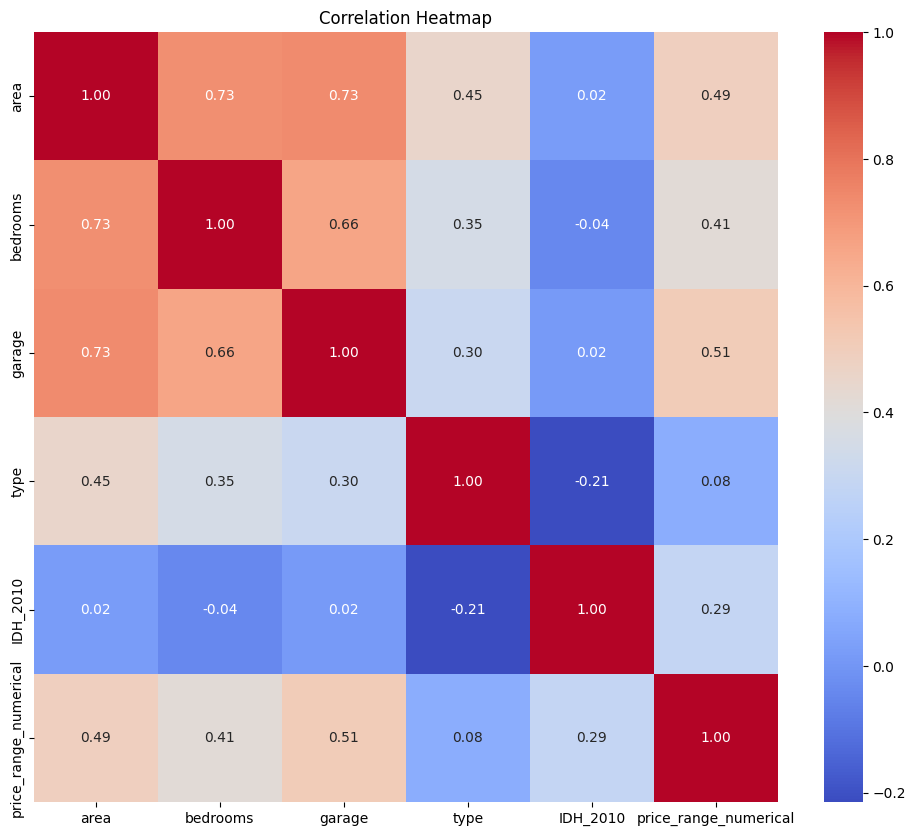

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the desired attributes from the dataframe
heatMap_df = df.drop('price_range', axis=1)

# Create the correlation matrix
corr_matrix = heatMap_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Dicionário de mapeamento para transformar os valores
price_range_map = {
    'Até 1850': 0,
    '1850 a 3200': 1,
    '3200 a 5650': 2,
    '5650 ou mais': 3
}

# Aplicar a transformação
df['price_range'] = df['price_range'].map(price_range_map)


In [ ]:
df = df.drop('price_range_numerical', axis=1)

In [ ]:
# Separando as features (X) e o target (y)
X = df.drop('price_range', axis=1)
y = df['price_range']


In [ ]:
print(y.unique())

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]


In [ ]:
df

,area,bedrooms,garage,type,IDH_2010,price_range
0,0.036207,0.166667,0.000000,0.000000,0.678414,1
1,0.025862,0.166667,0.166667,0.000000,0.392070,0
2,0.031034,0.166667,0.000000,0.333333,1.000000,2
3,0.096552,0.333333,0.333333,0.666667,0.392070,1
4,0.032759,0.166667,0.000000,0.000000,0.766520,2
...,...,...,...,...,...,...
9900,0.162069,0.333333,0.166667,0.333333,0.854626,3
9901,0.603448,0.666667,0.666667,0.333333,0.299559,3
9902,0.144828,0.166667,0.333333,0.333333,0.854626,2
9903,0.131034,0.166667,0.000000,0.333333,0.634361,3


# Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            test_size = 0.3,
                                            random_state=42,
                                            stratify=y)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)
print("Class:", np.unique(y_test)) # class unique

Train: (6933, 5) (6933,)
Test:  (2972, 5) (2972,)
Class: [0 1 2 3]


In [ ]:
x_scaled = X

## knn

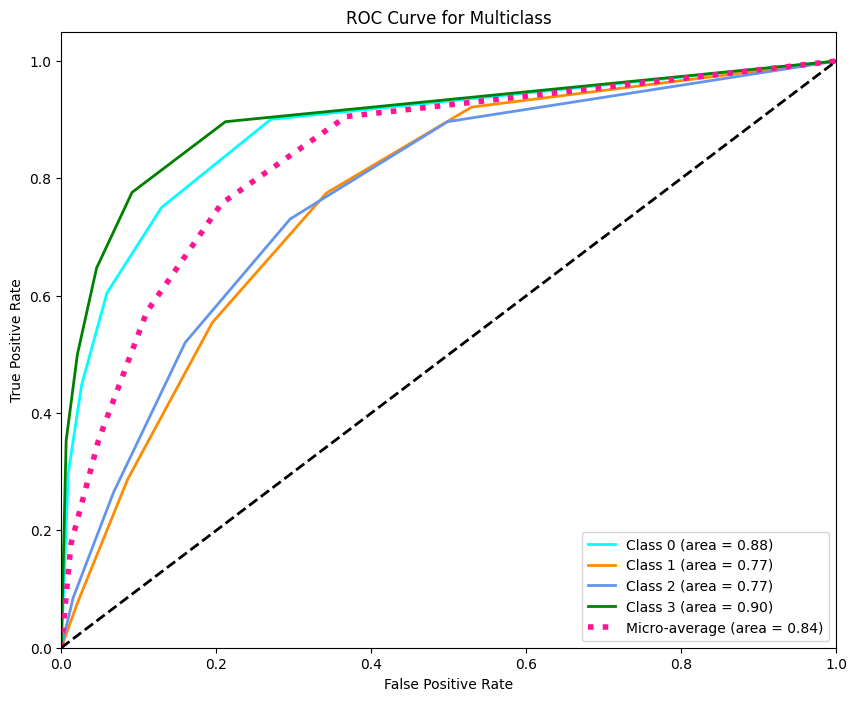

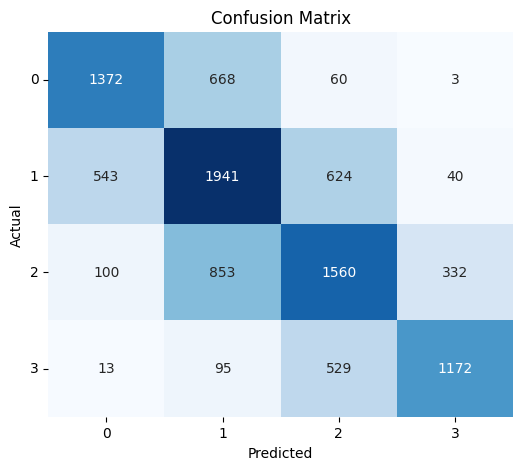

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      2103
           1       0.55      0.62      0.58      3148
           2       0.56      0.55      0.56      2845
           3       0.76      0.65      0.70      1809

    accuracy                           0.61      9905
   macro avg       0.64      0.62      0.62      9905
weighted avg       0.62      0.61      0.61      9905

Balanced Accuracy Score: 0.6162963611991366


In [ ]:
from sklearn.preprocessing import label_binarize # Importing label_binarize
from sklearn.metrics import roc_curve, auc

# CROSS VALIDATION
# Criar o modelo KNN
modeloCV = KNeighborsClassifier(n_neighbors=5)

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
knn_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    knn_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, knn_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, knn_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, knn_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix

# # Treinando o modelo KNN
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)

# # Fazendo previsões
# knn_pred = knn.predict(X_test)

# # Avaliando o modelo
# # Matriz de Confusão
# conf_matrix = confusion_matrix(y_test, knn_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()

# print("\nRelatório de Classificação:")
# print(classification_report(y_test, knn_pred))


# balanced_accuracy_score(y_test, knn_pred)

## Random Forest

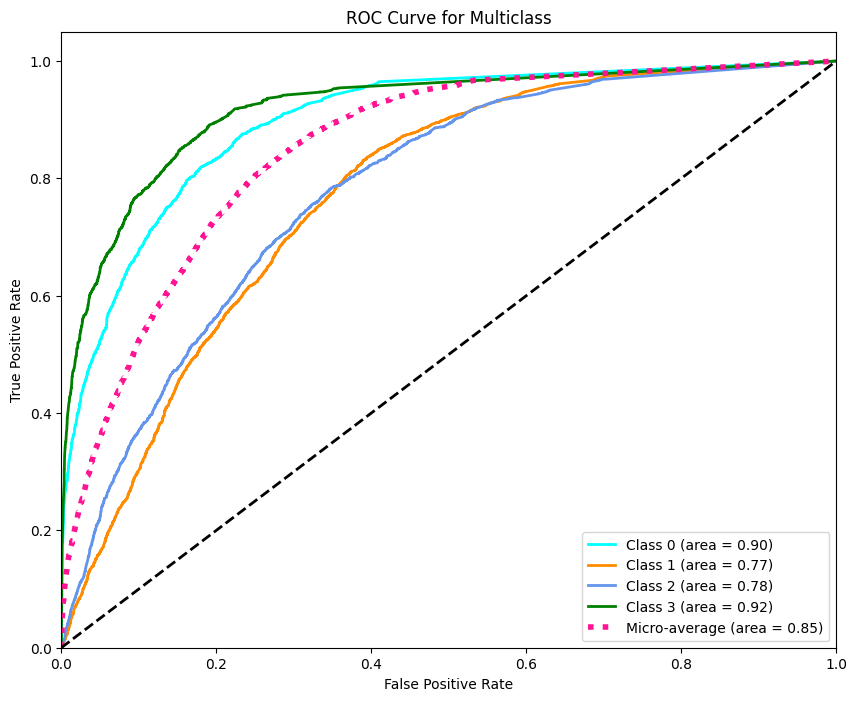

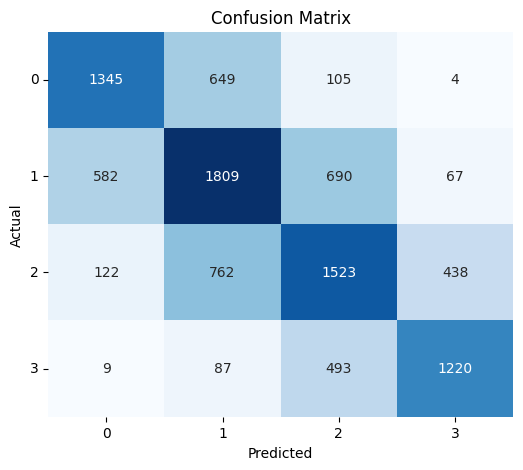

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2103
           1       0.55      0.57      0.56      3148
           2       0.54      0.54      0.54      2845
           3       0.71      0.67      0.69      1809

    accuracy                           0.60      9905
   macro avg       0.61      0.61      0.61      9905
weighted avg       0.60      0.60      0.60      9905

Balanced Accuracy Score: 0.6059859955884676


In [ ]:
from sklearn.preprocessing import label_binarize # Importing label_binarize
from sklearn.metrics import roc_curve, auc

# CROSS VALIDATION
# Criar o modelo KNN
modeloCV = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores e semente aleatória

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
rf_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    rf_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, rf_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, rf_pred_all))


# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, rf_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# # Definindo o modelo Random Forest
# rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores e semente aleatória

# # Treinando o modelo com o conjunto de treinamento
# rf.fit(X_train, y_train)

# # Fazendo previsões no conjunto de teste
# rf_pred = rf.predict(X_test)



# conf_matrix = confusion_matrix(y_test, rf_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()

# # Avaliando o modelo
# print("\nClassification Report:")
# print(classification_report(y_test, rf_pred))

# balanced_accuracy_score(y_test, rf_pred)

## Decision tree

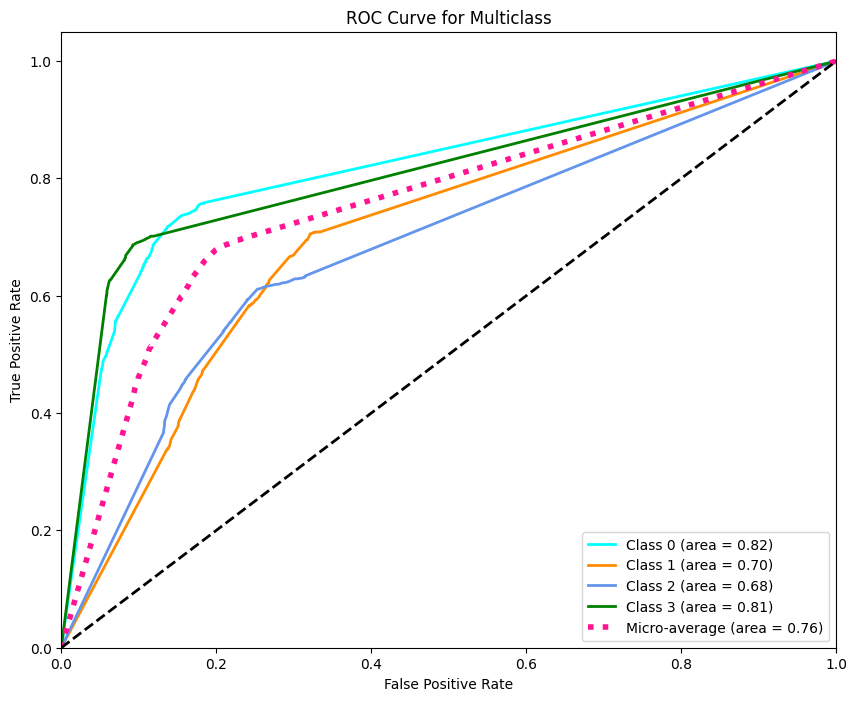

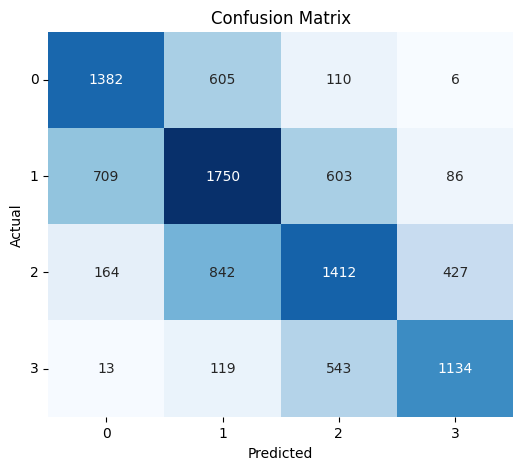

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63      2103
           1       0.53      0.56      0.54      3148
           2       0.53      0.50      0.51      2845
           3       0.69      0.63      0.66      1809

    accuracy                           0.57      9905
   macro avg       0.59      0.58      0.59      9905
weighted avg       0.57      0.57      0.57      9905

Balanced Accuracy Score: 0.5840599856867512


In [ ]:
from sklearn.preprocessing import label_binarize # Importing label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# CROSS VALIDATION
# Criar o modelo KNN
modeloCV = DecisionTreeClassifier(random_state=42)

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
dt_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    dt_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, dt_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, dt_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, dt_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.tree import DecisionTreeClassifier, export_text
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree


# # Treinando o modelo Decision Tree
# dt = DecisionTreeClassifier(random_state=42)
# dt.fit(X_train, y_train)

# # Fazendo previsões
# dt_pred = dt.predict(X_test)

# conf_matrix = confusion_matrix(y_test, dt_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()

# print("\nRelatório de Classificação:")
# print(classification_report(y_test, dt_pred))

# # Visualizando a árvore de decisão
# # plt.figure(figsize=(20, 10))
# # plot_tree(dt, feature_names=df.drop('price_range', axis=1).columns, class_names=[str(c) for c in dt.classes_], filled=True)
# # plt.show()

# # Exportando a árvore de decisão em formato de texto
# # print("\nDecision Tree Rules:")
# # print(export_text(dt, feature_names=list(df.drop('price_range', axis=1).columns)))

# balanced_accuracy_score(y_test, dt_pred)

## SVM

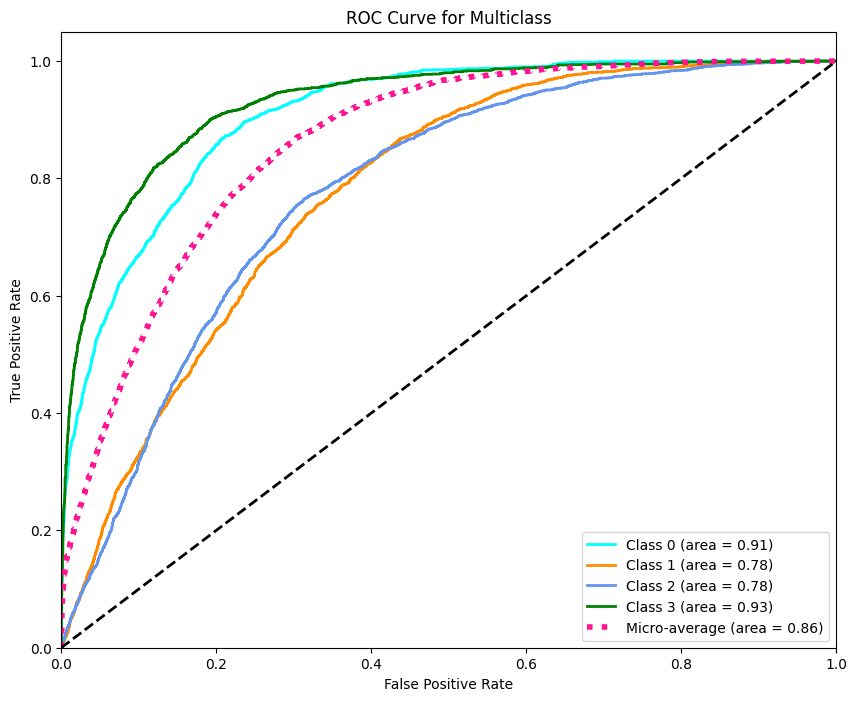

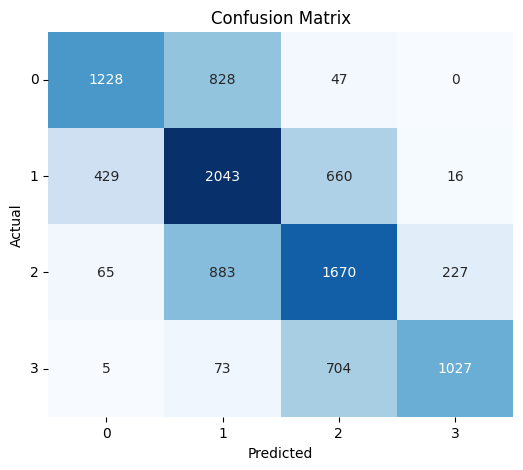

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      2103
           1       0.53      0.65      0.59      3148
           2       0.54      0.59      0.56      2845
           3       0.81      0.57      0.67      1809

    accuracy                           0.60      9905
   macro avg       0.65      0.60      0.61      9905
weighted avg       0.62      0.60      0.61      9905

Balanced Accuracy Score: 0.5969057255428475


In [ ]:
from sklearn.preprocessing import label_binarize # Importing label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# CROSS VALIDATION
# Criar o modelo KNN
# Initialize SVC with probability=True
modeloCV = SVC(kernel='linear', random_state=42, probability=True)

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
svm_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    # predict_proba is now available because probability=True
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    svm_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades


# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, svm_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, svm_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, svm_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import numpy as np

# # Treinando o modelo SVM
# svm = SVC(kernel='linear', random_state=42)
# svm.fit(X_train, y_train)

# # Fazendo previsões
# svm_pred = svm.predict(X_test)

# # Avaliando o modelo
# conf_matrix = confusion_matrix(y_test, svm_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()


# print("\nRelatório de Classificação:")
# print(classification_report(y_test, svm_pred))

# balanced_accuracy_score(y_test, svm_pred)

## Gradient Boosting

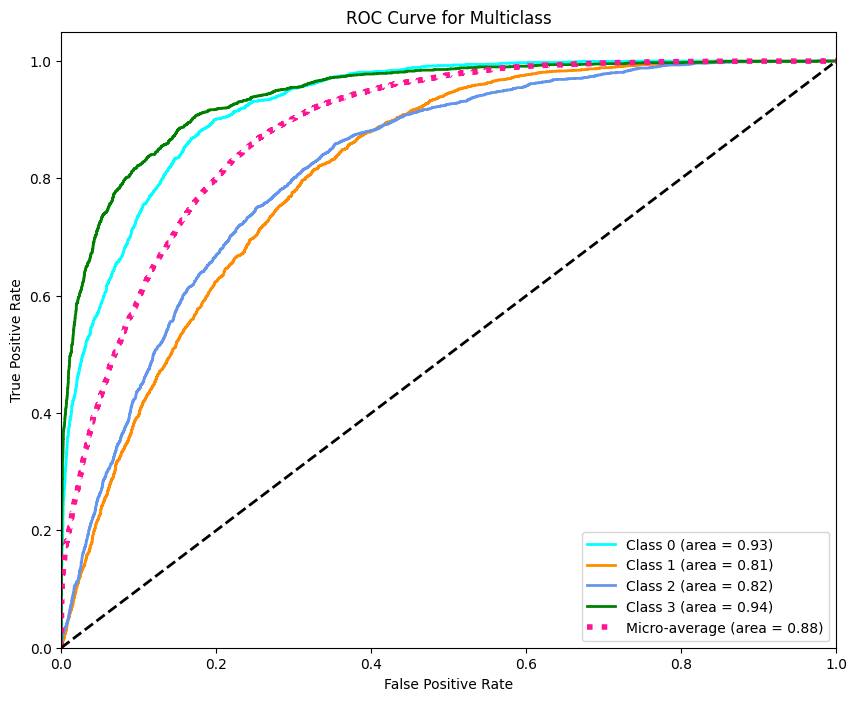

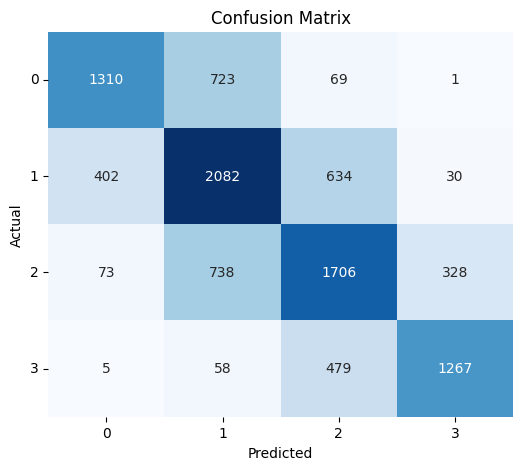

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      2103
           1       0.58      0.66      0.62      3148
           2       0.59      0.60      0.60      2845
           3       0.78      0.70      0.74      1809

    accuracy                           0.64      9905
   macro avg       0.67      0.65      0.66      9905
weighted avg       0.65      0.64      0.64      9905

Balanced Accuracy Score: 0.6460818496884706


In [ ]:
from sklearn.preprocessing import label_binarize # Importing label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


# CROSS VALIDATION
modeloCV = GradientBoostingClassifier(random_state=42)

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
gb_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    gb_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, gb_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, gb_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, gb_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Criando o modelo Gradient Boosting
# model = GradientBoostingClassifier(random_state=42)

# # Ajustando o modelo aos dados de treino
# model.fit(X_train, y_train)

# # Fazendo previsões nos dados de teste
# gb_pred = model.predict(X_test)

# # Avaliando a performance do modelo
# conf_matrix = confusion_matrix(y_test, gb_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()

# accuracy = accuracy_score(y_test, gb_pred)
# print("Accuracy:", accuracy)
# print("\nRelatório de Classificação:\n", classification_report(y_test, gb_pred))



## Naive Bayes

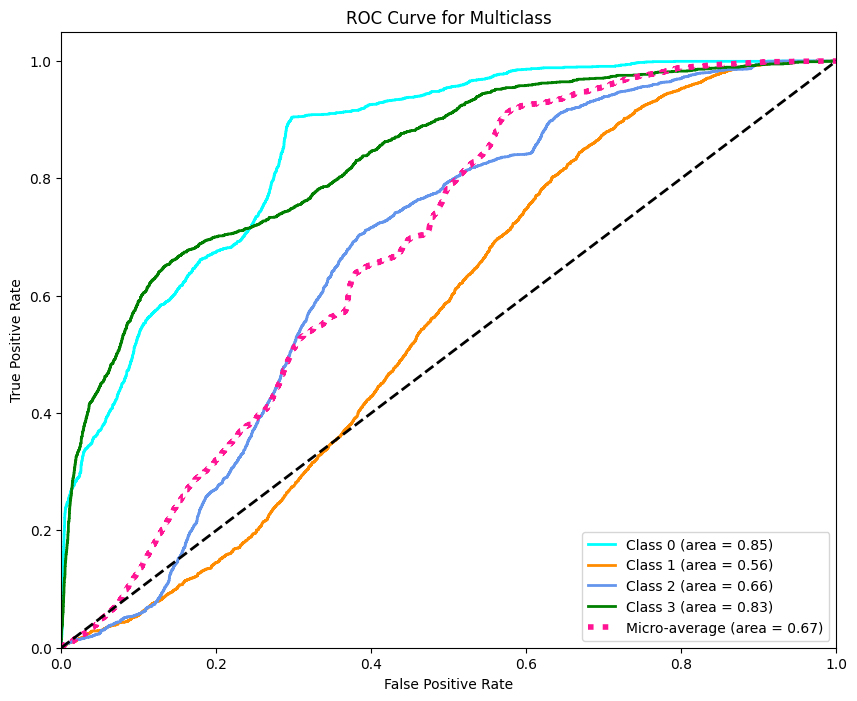

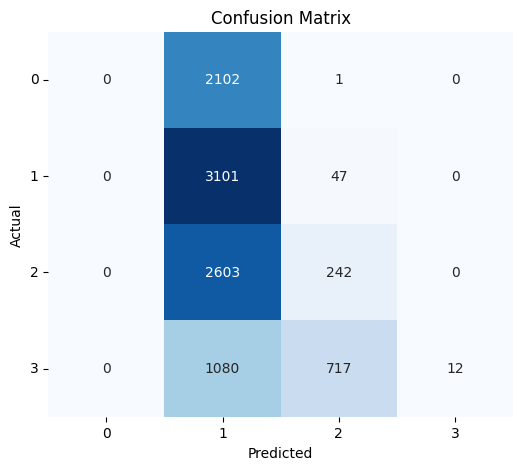

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2103
           1       0.35      0.99      0.52      3148
           2       0.24      0.09      0.13      2845
           3       1.00      0.01      0.01      1809

    accuracy                           0.34      9905
   macro avg       0.40      0.27      0.16      9905
weighted avg       0.36      0.34      0.20      9905

Balanced Accuracy Score: 0.26919122405900997


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB


# CROSS VALIDATION
modeloCV = MultinomialNB()

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
nb_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    nb_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, nb_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, nb_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, nb_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# nb_classifier = MultinomialNB()
# nb_classifier.fit(X_train, y_train)

# nb_pred = nb_classifier.predict(X_test)

# conf_matrix = confusion_matrix(y_test, nb_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()


# accuracy = accuracy_score(y_test, nb_pred)
# print("Accuracy:", accuracy)
# print("\nRelatório de Classificação:\n", classification_report(y_test, nb_pred))

## Multi Layer Perceptron

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

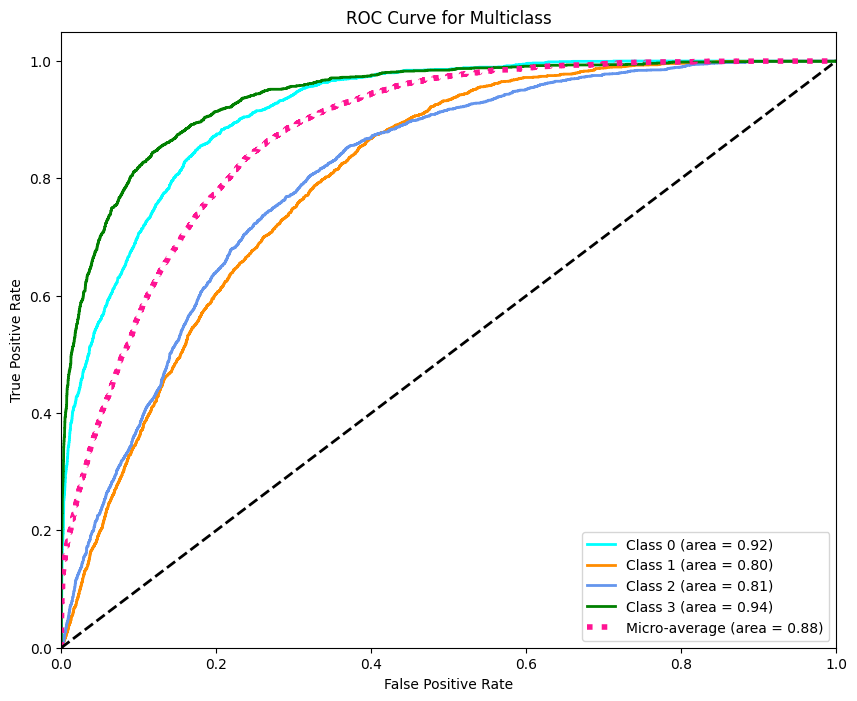

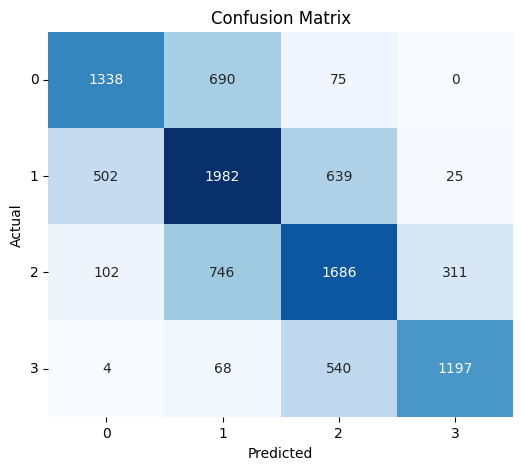

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.69      0.64      0.66      2103
           1       0.57      0.63      0.60      3148
           2       0.57      0.59      0.58      2845
           3       0.78      0.66      0.72      1809

    accuracy                           0.63      9905
   macro avg       0.65      0.63      0.64      9905
weighted avg       0.63      0.63      0.63      9905

Balanced Accuracy Score: 0.6300375555177383


In [ ]:
from sklearn.neural_network import MLPClassifier


# CROSS VALIDATION
modeloCV = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# Configurar o StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para armazenar os resultados
y_true_all = []
mlp_pred_all = []
y_proba_all = []

# Validação cruzada
for train_index, test_index in cv.split(x_scaled, y):
    # Use .iloc to select rows by numerical index
    X_train, X_test = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modeloCV.fit(X_train, y_train)

    # Fazer predições
    y_pred = modeloCV.predict(X_test)
    y_proba = modeloCV.predict_proba(X_test)  # Armazena todas as probabilidades para todas as classes

    # Armazenar os resultados
    y_true_all.extend(y_test)
    mlp_pred_all.extend(y_pred)
    y_proba_all.append(y_proba)  # Acumula as matrizes de probabilidades

# Concatena probabilidades de todas as iterações
y_proba_all = np.vstack(y_proba_all)  # Transforma em um array 2D

# Binarize the output
y_true_bin = label_binarize(y_true_all, classes=np.unique(y))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_proba_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_proba_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (area = {roc_auc[i]:0.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         color='deeppink', linestyle=':', linewidth=4,
         label=f'Micro-average (area = {roc_auc["micro"]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


# Matriz de Confusão
conf_matrix = confusion_matrix(y_true_all, mlp_pred_all)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
plt.show()

# Relatório de Classificação
print("Relatório de Classificação:")
print(classification_report(y_true_all, mlp_pred_all))

# Calcular Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_true_all, mlp_pred_all)
print(f"Balanced Accuracy Score: {balanced_acc}")

In [ ]:
# from sklearn.neural_network import MLPClassifier

# mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

# # Train the classifier
# mlp_classifier.fit(X_train, y_train)

# # Make predictions
# mlp_pred = mlp_classifier.predict(X_test)

# # Evaluate the model
# conf_matrix = confusion_matrix(y_test, mlp_pred)

# plt.figure(figsize=(6, 5))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix")
# plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"])
# plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=["0", "1", "2", "3"], rotation=0)
# plt.show()


# accuracy = accuracy_score(y_test, mlp_pred)
# print("Accuracy:", accuracy)
# print("\nRelatório de Classificação:\n", classification_report(y_test, mlp_pred))

# Ensemble

In [ ]:
from scipy.stats import mode


# voting_pred = mode(np.vstack( [knn_pred, dt_pred, rf_pred, svm_pred, gb_pred, mlp_pred] ), axis=0 )
voting_pred = mode(np.vstack( [knn_pred_all, dt_pred_all, rf_pred_all, svm_pred_all, gb_pred_all, mlp_pred_all] ), axis=0 )


# balanced_accuracy_score(y_test, voting_pred[0])
balanced_acc_voting = balanced_accuracy_score(y_true_all, voting_pred[0])
print(f"Balanced Accuracy Score (Voting): {balanced_acc_voting}")

Balanced Accuracy Score (Voting): 0.6376370393036643


In [ ]:
all_preds = np.vstack([knn_pred_all, dt_pred_all, rf_pred_all, svm_pred_all, gb_pred_all, mlp_pred_all, nb_pred_all])

weights = np.zeros_like(all_preds, dtype=float)

weights[3, :] += 2
weights[4, :] += 4
weights[5, :] += 2

weights[0:3, :] += 1
weights[6, :] -=3


weighted_votes = np.zeros_like(all_preds)
for i in range(all_preds.shape[1]):
    for j in range(all_preds.shape[0]):
        weighted_votes[j, i] = weights[j, i]

weighted_preds = np.apply_along_axis(
    lambda x: np.bincount(x, weights=weights[:, x.argmax()]).argmax(),
    axis=0,
    arr=all_preds,
)

# balanced_acc = balanced_accuracy_score(y_test, weighted_preds)
# print(f"Balanced Accuracy: {balanced_acc}")

balanced_acc_voting = balanced_accuracy_score(y_true_all, weighted_preds)
print(f"Balanced Accuracy Score (Voting): {balanced_acc_voting}")

Balanced Accuracy Score (Voting): 0.6473826594286775


In [ ]:
all_preds = np.vstack([knn_pred_all, dt_pred_all, rf_pred_all, svm_pred_all, gb_pred_all, mlp_pred_all, nb_pred_all])

weights = np.zeros_like(all_preds, dtype=float)

weights[0, :] += 0.61
weights[1, :] += 0.58
weights[2, :] += 0.60
weights[3, :] += 0.59
weights[4, :] += 0.64
weights[5, :] += 0.63
weights[6, :] += 0.26

# weights[0:3, :] += 1


weighted_votes = np.zeros_like(all_preds)
for i in range(all_preds.shape[1]):
    for j in range(all_preds.shape[0]):
        weighted_votes[j, i] = weights[j, i]

weighted_preds = np.apply_along_axis(
    lambda x: np.bincount(x, weights=weights[:, x.argmax()]).argmax(),
    axis=0,
    arr=all_preds,
)

# balanced_acc = balanced_accuracy_score(y_test, weighted_preds)
# print(f"Balanced Accuracy: {balanced_acc}")

balanced_acc_voting = balanced_accuracy_score(y_true_all, weighted_preds)
print(f"Balanced Accuracy Score (Voting): {balanced_acc_voting}")

Balanced Accuracy Score (Voting): 0.6361523024401405
